Features documentation: https://web.mit.edu/music21/doc/moduleReference/moduleFeaturesJSymbolic.html 

# Set up music21 for Colab

Click the play button below to upgrade music21 and install MuseScore to use in Google Colab

In [ ]:
!pip install --upgrade music21

In [ ]:
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.net

In [ ]:
!apt-get install xvfb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 784 kB in 1s (1,257 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 156170 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
from music21 import *
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

# music21 is Open Source under the BSD License
# Copyright (c) 2006-22 Michael Scott Asato Cuthbert and cuthbertLab
# Support music21 by citing it in your research or produts:
#
#     Cuthbert, Michael Scott.  
#     _music21: a Toolkit for Computer-Aided Music Research_
#     https://web.mit.edu/music21
#     2006-22

# Test that it's set up

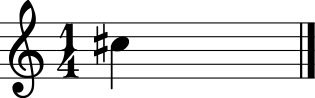

In [ ]:
# if this doesn't work, restart the runtime then rerun the setup code

from music21 import *
n = note.Note('C#5')
n.show()

# Bring in midi files from MAESTRO

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df3 = pd.read_json("PATH TO MAESTRO JSON FILE")

In [ ]:
debussy_songs = []
rachman_songs = []

for i in range(df3.shape[0]): 
  if df3['canonical_composer'][i] == "Claude Debussy":
    debussy_songs.append(df3['midi_filename'][i])

for i in range(df3.shape[0]): 
  if df3['canonical_composer'][i] == "Sergei Rachmaninoff":
    rachman_songs.append(df3['midi_filename'][i])

In [ ]:
path_prefix = 'PATH TO MAESTRO'
debussy_files = []
rachman_files = []

for i in range(len(debussy_songs)):
  debussy_files.append(path_prefix + debussy_songs[i])

for i in range(len(rachman_songs)):
  rachman_files.append(path_prefix + rachman_songs[i])

# Test using music21 with one midi file

In [ ]:
df3[df3['midi_filename'] == debussy_songs[0]]

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
41,Claude Debussy,"""Feux d'artifice"" from Book II",train,2008,2008/MIDI-Unprocessed_10_R3_2008_01-05_ORIG_MI...,2008/MIDI-Unprocessed_10_R3_2008_01-05_ORIG_MI...,242.752161


In [ ]:
fp = debussy_files[0]  #fp = file path (test with one file)
streamScore = midi.translate.midiFilePathToStream(fp)

In [ ]:
streamScore

<music21.stream.Score 0x7f294f0e8fd0>

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score 0x7f294f0e8fd0>>

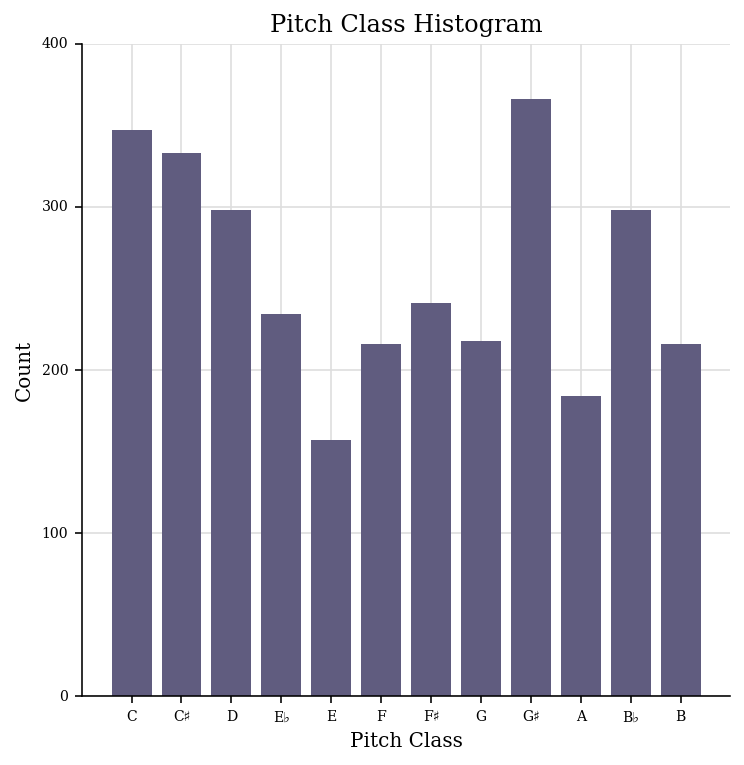

In [ ]:
streamScore.plot('histogram', 'pitchClass', 'count')

In [ ]:
# streamScore.show('midi')

I also listened to the midi version of this song and it sounds like the song but it also looks and sounds like it's missing a lot of notes/info. Then I tried with a simpler song (slower, fewer notes) and it sounded much better.

In [ ]:
# Try extracting one feature

''' Fraction of horizontal intervals that are repeated notes, minor thirds, major thirds,
 perfect fifths, minor sevenths, major sevenths, octaves, minor tenths or major tenths.'''

fe = features.jSymbolic.AmountOfArpeggiationFeature(streamScore)
f = fe.extract()
print(f.name)
print(f.vector)

Amount of Arpeggiation
[0.6644295302013423]


# Great! Now try getting a lot of features out of all of the songs

I'm going to start with using:



And see if any of them are terrible and ignore them


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def getFeaturesOne(song):
  fe1 = features.jSymbolic.AmountOfArpeggiationFeature(song)
  f1 = fe1.extract()

  #fe2 = features.jSymbolic.AverageMelodicIntervalFeature(song)
  #f2 = fe2.extract()

  #fe3 = features.jSymbolic.AverageNoteDurationFeature(song)
  #f3 = fe3.extract()

  return f1 #, f2, f3

In [ ]:
#it took 2 minutes to run this on 3 files, 7 min to run 10 files :(

Deb_feat1 = []

for i in debussy_files[:10]:
  fp = i
  streamScore = midi.translate.midiFilePathToStream(fp)
  feat = getFeaturesOne(streamScore)
  Deb_feat1.append(feat.vector) #, Feat2, Feat3 = getFeaturesOne(streamScore)

In [ ]:
#it took 2 minutes to run this on 3 files :(

Rach_feat1 = []

for i in rachman_files[:10]:
  fp = i
  streamScore = midi.translate.midiFilePathToStream(fp)
  feat = getFeaturesOne(streamScore)
  Rach_feat1.append(feat.vector) #, Feat2, Feat3 = getFeaturesOne(streamScore)

In [ ]:
Deb_feat1 = np.array(Deb_feat1)
Rach_feat1 = np.array(Rach_feat1)

In [ ]:
Deb_feat1 = Deb_feat1.flatten()
Rach_feat1 = Rach_feat1.flatten()

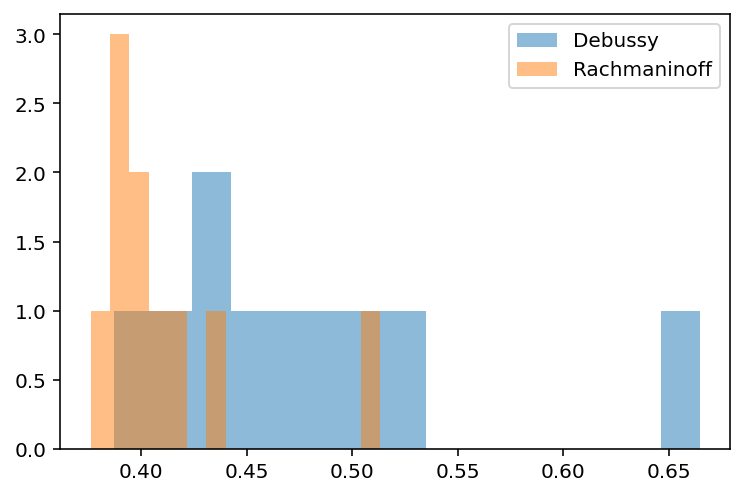

In [ ]:
nbins = 15

plt.hist(Deb_feat1, alpha = 0.5, label = "Debussy", bins = nbins)
plt.hist(Rach_feat1, alpha = 0.5, label = "Rachmaninoff", bins = nbins)
plt.legend()
plt.show()

In [ ]:
def getFeaturesTwo(song):

  fe2 = features.jSymbolic.AverageMelodicIntervalFeature(song)
  f2 = fe2.extract()

  #fe3 = features.jSymbolic.AverageNoteDurationFeature(song)
  #f3 = fe3.extract()

  return f2 #, f3

In [ ]:
#it took 2 minutes to run this on 3 files, 7 min to run 10 files :(

Deb_feat2 = []

for i in debussy_files[:10]:
  fp = i
  streamScore = midi.translate.midiFilePathToStream(fp)
  feat = getFeaturesTwo(streamScore)
  Deb_feat2.append(feat.vector) #, Feat2, Feat3 = getFeaturesOne(streamScore)


  #it took 2 minutes to run this on 3 files :(

Rach_feat2 = []

for i in rachman_files[:10]:
  fp = i
  streamScore = midi.translate.midiFilePathToStream(fp)
  feat = getFeaturesTwo(streamScore)
  Rach_feat2.append(feat.vector) #, Feat2, Feat3 = getFeaturesOne(streamScore)

In [ ]:
Deb_feat2 = np.array(Deb_feat2)
Rach_feat2 = np.array(Rach_feat2)

Deb_feat2 = Deb_feat2.flatten()
Rach_feat2 = Rach_feat2.flatten()

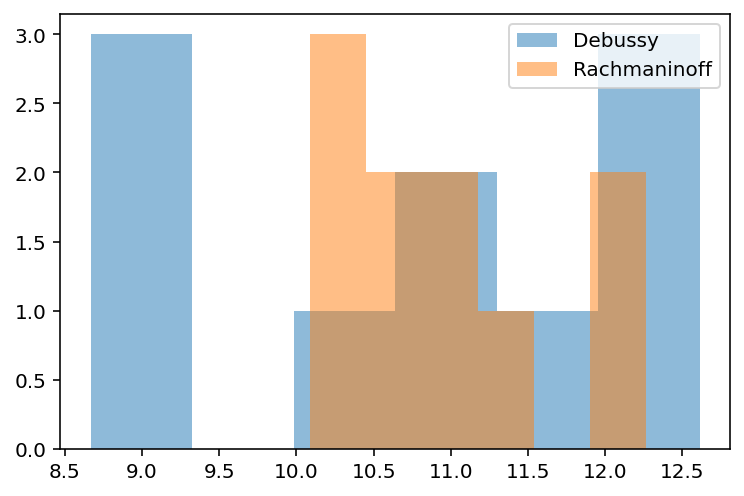

In [ ]:
nbins = 6

plt.hist(Deb_feat2, alpha = 0.5, label = "Debussy", bins = nbins)
plt.hist(Rach_feat2, alpha = 0.5, label = "Rachmaninoff", bins = nbins)
plt.legend()
plt.show()

In [ ]:
def getFeaturesThree(song):
  fe3 = features.jSymbolic.AverageNoteDurationFeature(song)
  f3 = fe3.extract()

  return f3

In [ ]:
#it took 2 minutes to run this on 3 files, 7 min to run 10 files :(

Deb_feat3 = []

for i in debussy_files:
  fp = i
  streamScore = midi.translate.midiFilePathToStream(fp)
  feat = getFeaturesTwo(streamScore)
  Deb_feat3.append(feat.vector) #, Feat2, Feat3 = getFeaturesOne(streamScore)


  #it took 2 minutes to run this on 3 files :(

Rach_feat3 = []

for i in rachman_files[:45]:
  fp = i
  streamScore = midi.translate.midiFilePathToStream(fp)
  feat = getFeaturesTwo(streamScore)
  Rach_feat3.append(feat.vector) #, Feat2, Feat3 = getFeaturesOne(streamScore)

In [ ]:
Deb_feat3 = np.array(Deb_feat3)
Rach_feat3 = np.array(Rach_feat3)

Deb_feat3 = Deb_feat3.flatten()
Rach_feat3 = Rach_feat3.flatten()

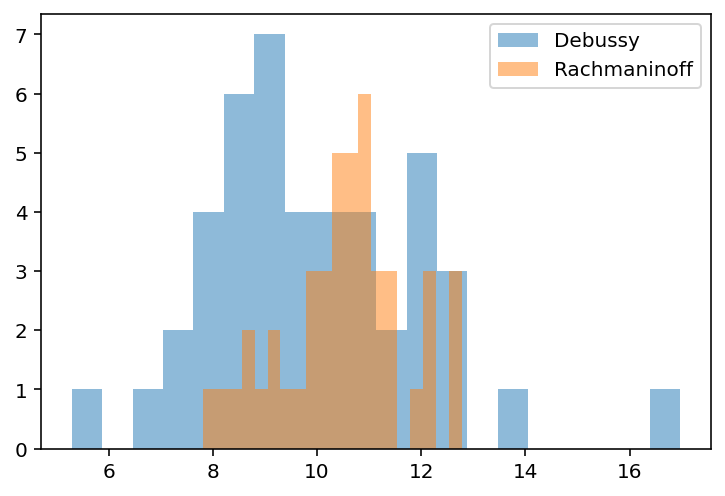

In [ ]:
nbins = 20

plt.hist(Deb_feat3, alpha = 0.5, label = "Debussy", bins = nbins)
plt.hist(Rach_feat3, alpha = 0.5, label = "Rachmaninoff", bins = nbins)
plt.legend()
plt.show()

# Features to try
* Amount of arpeggiation

* Average melodic interval

* Average note duration

* Average time between attacks

* Chromatic motion

* Direction of motion (like Josh said)

* Distance between most common melodic intervals

* Duration of melodic arcs

* Maximum note duration

* Minimum note duration

* Most common melodic interval

* Most common melodic interval prevalence

* Most common pitch class

* Most common pitch class prevalence

* Most common pitch

* Most common pitch prevalence

* Note density

* Number of common melodic intervals

* Pitch class distribution

* Pitch class variety

* Pitch variety

* Rhythmic variability

* Size of melodic arcs